<a href="https://colab.research.google.com/github/arjnmj/ML-Fraud-Detection/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df['Hour'] = (df['Time'] / 3600) % 24
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23.996111
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23.996389
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23.996667
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23.996667


In [5]:
import numpy as np
# Create cyclic features
df['Time_sin'] = np.sin((2 * np.pi * df['Hour']) / 24)
df['Time_cos'] = np.cos((2 * np.pi * df['Hour']) / 24)

# Drop the original 'Time' and 'Hour' columns
df = df.drop(columns=['Time', 'Hour'])
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_sin,Time_cos
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,1.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,1.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000073,1.000000
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000073,1.000000
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000145,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-0.001018,0.999999
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.000945,1.000000
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,-0.000873,1.000000
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.000873,1.000000


In [6]:
# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [7]:
# prompt: check skewness of features

from scipy.stats import skew

# Calculate skewness for each feature
skewness = X.skew()

# Print or analyze the skewness values
print(skewness)


V1          -3.280667
V2          -4.624866
V3          -2.240155
V4           0.676292
V5          -2.425901
V6           1.826581
V7           2.553907
V8          -8.521944
V9           0.554680
V10          1.187141
V11          0.356506
V12         -2.278401
V13          0.065233
V14         -1.995176
V15         -0.308423
V16         -1.100966
V17         -3.844914
V18         -0.259880
V19          0.109192
V20         -2.037155
V21          3.592991
V22         -0.213258
V23         -5.875140
V24         -0.552499
V25         -0.415793
V26          0.576693
V27         -1.170209
V28         11.192091
Amount      16.977724
Time_sin     0.537449
Time_cos     0.306237
dtype: float64


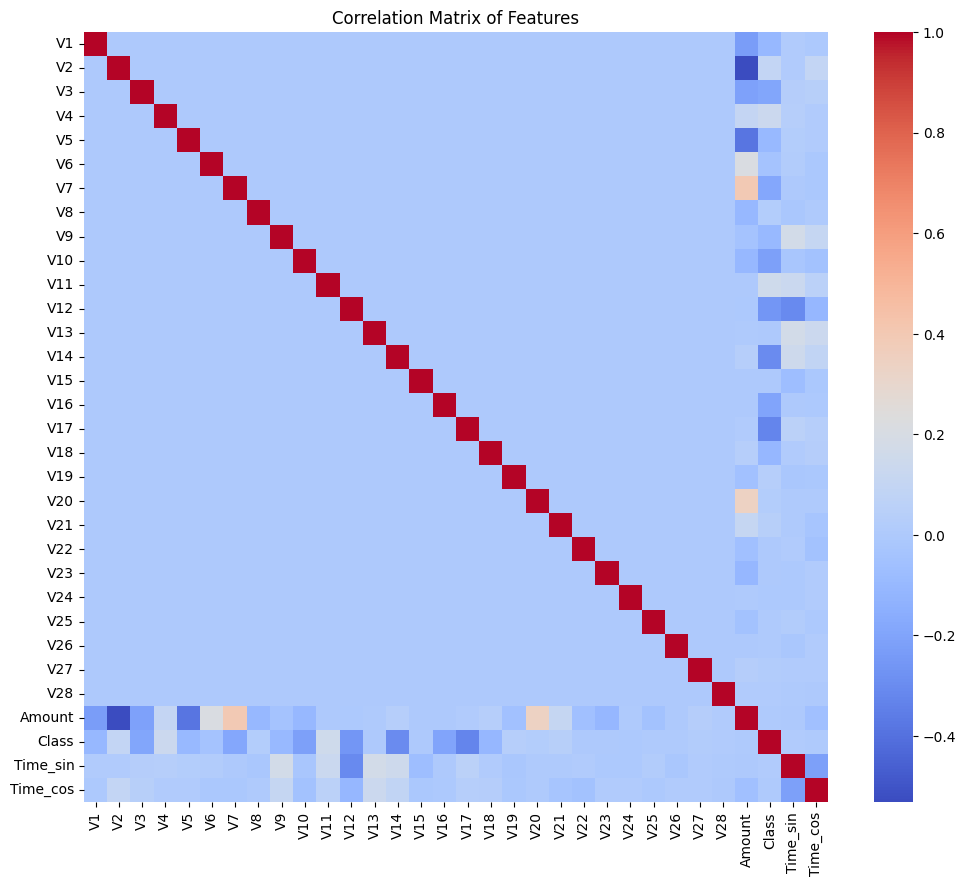

In [8]:
# prompt: correlation matrix plot

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Time_sin,Time_cos
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,...,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,-0.711260,0.702929
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,...,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0.363996,-0.931400
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,...,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0.145579,-0.989347
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,...,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,-0.218143,-0.975917
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,...,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,-0.922734,-0.385436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233802,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,0.212619,...,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,5.99,-0.967965,-0.251084
85418,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,0.108640,...,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,36.99,-0.957235,-0.289310
29062,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,-0.131553,...,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,45.42,0.543358,-0.839501
13766,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,-0.268878,...,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887,0.89,0.979149,-0.203143


In [11]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Time_sin,Time_cos
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,...,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,-0.711260,0.702929
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,...,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0.363996,-0.931400
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,...,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0.145579,-0.989347
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,...,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,-0.218143,-0.975917
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,...,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,-0.922734,-0.385436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233802,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,0.212619,...,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,5.99,-0.967965,-0.251084
85418,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,0.108640,...,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,36.99,-0.957235,-0.289310
29062,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,-0.131553,...,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,45.42,0.543358,-0.839501
13766,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,-0.268878,...,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887,0.89,0.979149,-0.203143


In [12]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Time_sin,Time_cos
263020,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,0.650757,...,0.810034,-0.224327,0.707899,-0.135837,0.045102,0.533837,0.291319,23.00,-0.767911,0.640557
11378,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,-1.000418,...,0.109305,-0.813272,0.042996,-0.027660,-0.910247,0.110802,-0.511938,11.85,0.991885,0.127137
147283,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,7.398491,...,0.016867,-0.132058,-1.483996,-0.296011,0.062823,0.552411,0.509764,76.07,0.139605,0.990207
219439,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,0.047859,...,-0.639426,0.331818,-0.067584,-0.283675,0.203529,-0.063621,-0.060077,0.99,-0.772272,-0.635292
36939,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,-1.579654,...,-0.328294,-0.154631,0.619449,0.818998,-0.330525,0.046884,0.104527,1.50,0.318615,-0.947884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54199,-0.863057,0.225429,2.458855,0.613099,0.067149,1.716173,-0.254484,0.825754,0.407484,-0.850483,...,0.695818,0.101555,-0.683590,-0.505613,-0.343860,0.218972,0.127074,35.97,-0.225589,-0.974223
184616,1.397799,-1.426153,-0.369131,0.891825,-1.164153,-0.166657,-0.320745,-0.023070,1.800818,-0.454388,...,-0.479606,0.053303,-0.117313,-0.425722,-0.568239,0.001064,0.017812,297.63,0.236979,-0.971515
274532,-1.047727,0.685141,0.195457,-3.583402,0.082922,-0.444060,0.261275,0.457403,1.225167,-1.734057,...,-0.388817,-0.095996,-1.059673,-0.392663,-0.781760,0.017347,0.145133,16.39,-0.470114,0.882606
269819,2.159972,-1.084234,-0.858819,-1.126188,-0.647032,0.234289,-1.164932,0.138244,-0.045273,0.910437,...,0.932738,0.077597,0.119508,-0.090098,-0.101767,-0.002565,-0.056766,19.95,-0.609396,0.792866


In [13]:
from scipy.stats import skew

skewed_features = X_train.columns[abs(skew(X_train)) > 1]
print("Skewed Features:", skewed_features.tolist())

Skewed Features: ['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16', 'V17', 'V20', 'V21', 'V23', 'V28', 'Amount']


In [14]:
from sklearn.preprocessing import PowerTransformer

# Initialize and fit on training data
pt = PowerTransformer(method="yeo-johnson")
pt.fit(X_train[skewed_features])

# Transform train and test
X_train[skewed_features] = pt.transform(X_train[skewed_features])
X_test[skewed_features] = pt.transform(X_test[skewed_features])

In [15]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train (with class weights for imbalance)
model = LogisticRegression(
    class_weight={0:1, 1:4},  # Inverse of 578:1 imbalance
    solver="liblinear",
    penalty="l2",
    C=0.01
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



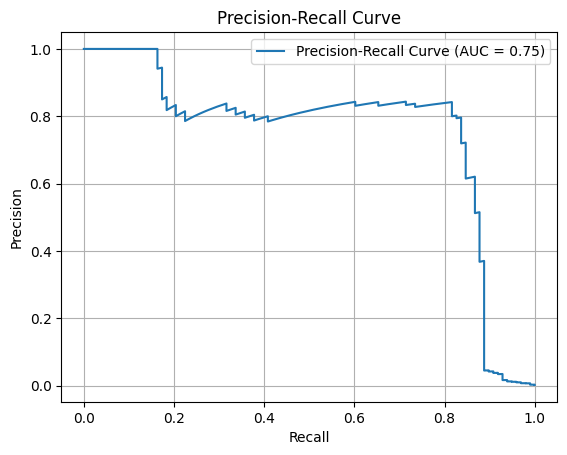

In [20]:
# prompt: precision recall curve for model

from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Calculate AUC
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, fbeta_score

# Calculate metrics
metrics = [['Accuracy', accuracy_score(y_test, y_pred)],
           ['Precision', precision_score(y_test, y_pred)],
           ['Recall', recall_score(y_test, y_pred)],
           ['F1_score', f1_score(y_test, y_pred)],
           ['F2_score', fbeta_score(y_test, y_pred, beta=2)]]  # Adding F2 score with beta=2 [[7]]

# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics, columns=['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.999386
1,Precision,0.824742
2,Recall,0.816327
3,F1_score,0.820513
4,F2_score,0.817996


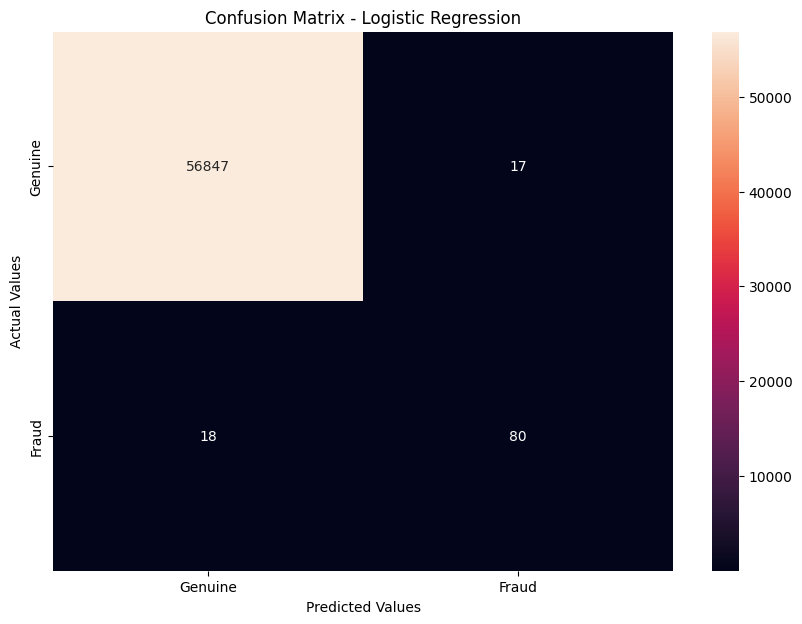

In [22]:
# prompt: confusion matrxi plot

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from your previous code

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()


     Feature  Importance
11       V12    0.551276
3         V4    0.516982
13       V14    0.500005
29  Time_sin    0.416359
9        V10    0.289462
10       V11    0.286937
2         V3    0.286419
0         V1    0.279846
15       V16    0.229421
30  Time_cos    0.181053
7         V8    0.138622
8         V9    0.132400
14       V15    0.123326
6         V7    0.120397
21       V22    0.107055
25       V26    0.103924
18       V19    0.103905
12       V13    0.094159
16       V17    0.090185
5         V6    0.047085
20       V21    0.039741
23       V24    0.033317
22       V23    0.022919
24       V25    0.019957
19       V20    0.018631
4         V5    0.016289
17       V18    0.012170
26       V27    0.006161
28    Amount    0.005108
1         V2    0.004977
27       V28    0.001606


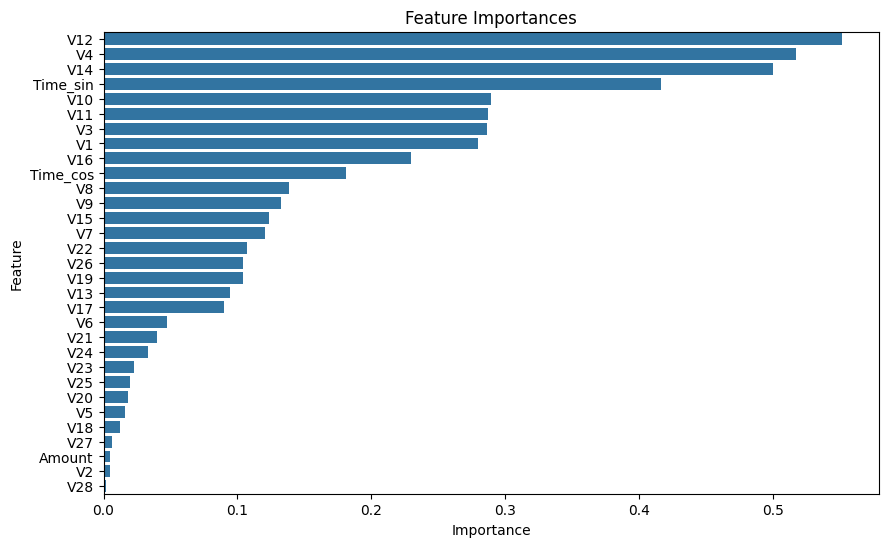

In [23]:
importances = model.coef_[0]

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': abs(importances)})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print or visualize feature importances
print(feature_importances)

# Visualize feature importances (optional)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


In [24]:
y_scores = model.predict_proba(X_test)[:, 1]  # Probability of the positive class
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, fbeta_score
import numpy as np

thresholds = np.arange(0.0, 1.0, 0.01)
results = []

for thresh in thresholds:
    y_pred = (y_scores >= thresh).astype(int)  # Apply threshold
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2, zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((thresh, precision, recall, f1, f2, accuracy))

# Print or analyze results
for thresh, prec, rec, f1, f2, acc in results:
    print(f"Threshold: {thresh:.2f}, Precision: {prec:.8f}, Recall: {rec:.8f}, F1: {f1:.8f}, F2:{f2:.8f}, Accuracy: {acc:.8f}")

Threshold: 0.00, Precision: 0.00172045, Recall: 1.00000000, F1: 0.00343498, F2:0.00854343, Accuracy: 0.00172045
Threshold: 0.01, Precision: 0.03212143, Recall: 0.92857143, F1: 0.06209485, F2:0.14108527, Accuracy: 0.95173976
Threshold: 0.02, Precision: 0.09446254, Recall: 0.88775510, F1: 0.17075564, F2:0.33130236, Accuracy: 0.98516555
Threshold: 0.03, Precision: 0.16666667, Recall: 0.88775510, F1: 0.28064516, F2:0.47592998, Accuracy: 0.99217022
Threshold: 0.04, Precision: 0.25513196, Recall: 0.88775510, F1: 0.39635535, F2:0.59345157, Accuracy: 0.99534778
Threshold: 0.05, Precision: 0.37885463, Recall: 0.87755102, F1: 0.52923077, F2:0.69466882, Accuracy: 0.99731400
Threshold: 0.06, Precision: 0.44791667, Recall: 0.87755102, F1: 0.59310345, F2:0.73630137, Accuracy: 0.99792844
Threshold: 0.07, Precision: 0.51515152, Recall: 0.86734694, F1: 0.64638783, F2:0.76301616, Accuracy: 0.99836733
Threshold: 0.08, Precision: 0.56291391, Recall: 0.86734694, F1: 0.68273092, F2:0.78268877, Accuracy: 0.9